# Let's test if the figaro method works

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import os
import sys

from scipy.stats import multivariate_normal

### First check the Z gaussian Distribution

we know the our z space data should follows a gaussian distribution centered in 0 and with a $\sigma$=1.0 since it was forced during the normalization flow:

In [2]:
# IMPORT Z SPACE DATA

path = 'new_mock4Marco_4deg/results/'
savepath = path+'Figaro_outputs/'

if not os.path.exists(savepath):
    os.makedirs(savepath)

z_train = pd.read_csv(path+'z_train_region.csv')
z_train = z_train.drop(columns=['Unnamed: 0'])

X_test = pd.read_csv(path+'X_test_10hl_region.csv')
z_test = pd.read_csv(path+'z_test_5hl_region.csv')
z_test = z_test.drop(columns=['Unnamed: 0'])
z_test.head(10)

# THEORETICAL NORMALIZED GAUSSIAN DISTRIBUTION
mean = 0
std_dev = 1
norm_train = np.linspace(-5, 5, z_train.shape[0])
norm_test = np.linspace(-5, 5, z_test.shape[0])
y_norm_train = multivariate_normal.pdf(norm_train, mean, std_dev)
y_norm_test = multivariate_normal.pdf(norm_test, mean, std_dev)

In [3]:
members_indices = np.where(z_test['source_id'] == 42)[0]
nonmembers_indices = np.where(z_test['source_id'] != 42)[0]

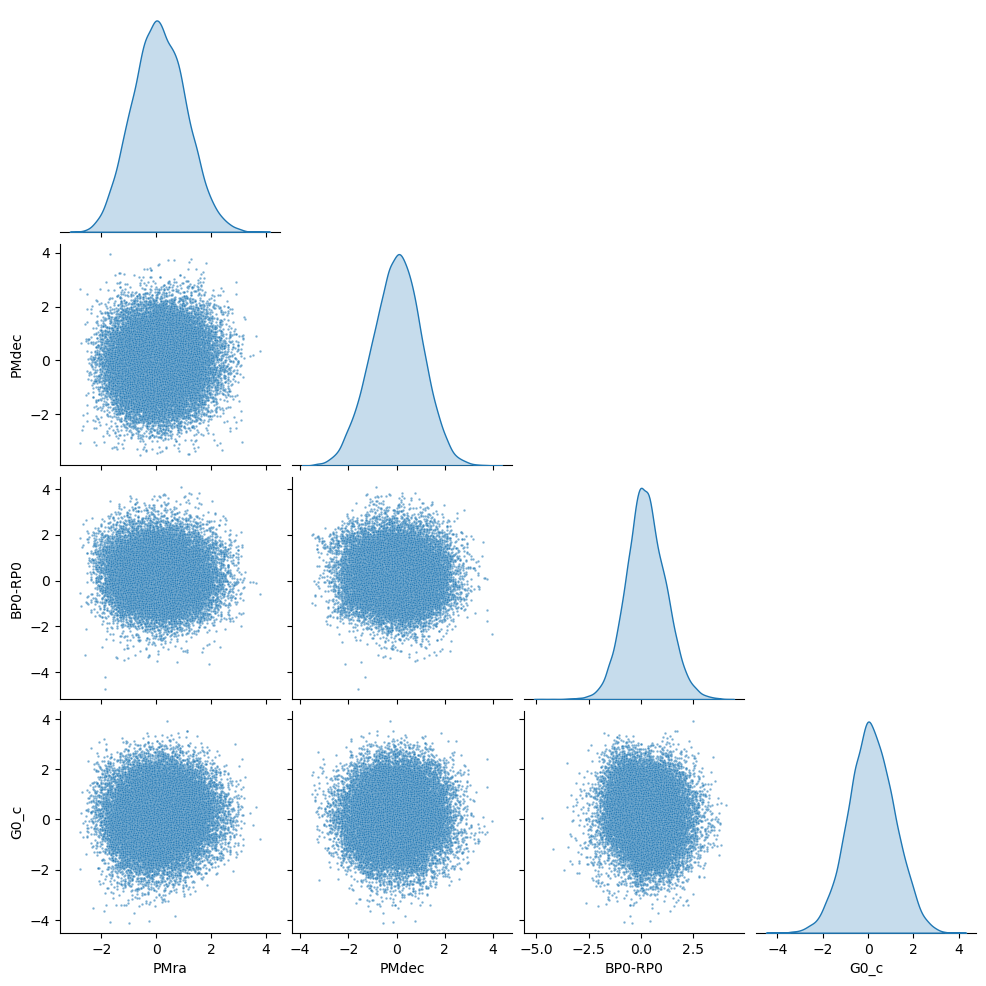

In [4]:
sns.pairplot(z_train[['PMra','PMdec','BP0-RP0','G0_c']], diag_kind='kde', plot_kws={"alpha": 0.6, "s": 3}, corner=True)

In [5]:
z_test.head()

,source_id,Xi,Xn,PMra,PMdec,BP0-RP0,G0_c,pmra_error,pmdec_error,pmra_pmdec_corr,Mahalanobis_PM,MemberScore
0,42,0.096785,0.179114,0.192681,1.499806,0.584133,-0.742758,0.162637,0.160297,-0.367,1.232248,0.250874
1,42,-0.126524,0.127148,0.082948,1.385924,0.587332,-0.853299,0.145267,0.133473,-0.367,0.635917,0.114067
2,42,0.217018,0.265220,0.699561,1.917257,0.580956,0.181294,0.412556,0.410381,-0.367,0.929124,0.318404
3,42,0.410965,0.071538,0.713469,1.674455,0.156929,0.534457,0.484729,0.446111,-0.367,0.715577,0.298499
4,42,0.209199,-0.287420,0.012986,0.704215,-2.959879,0.973967,0.700247,0.655137,-0.367,1.502599,0.534162


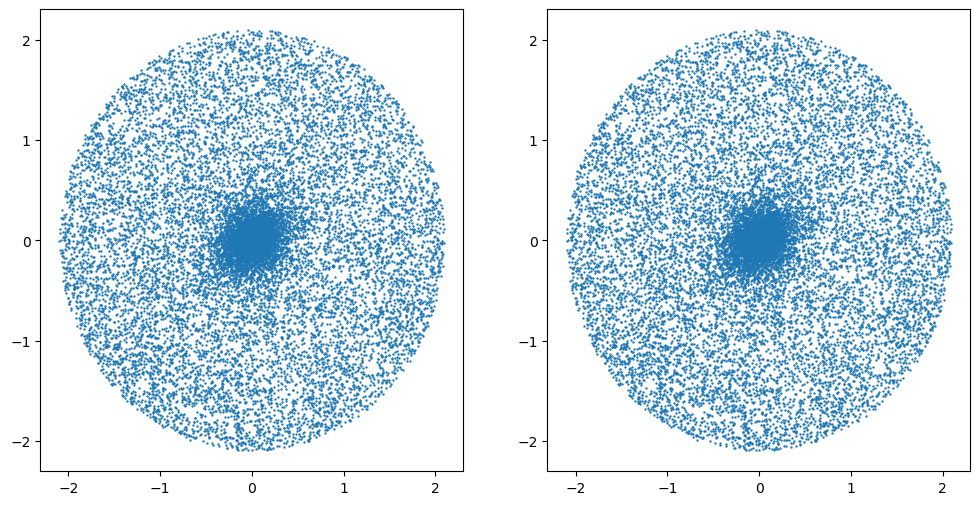

In [6]:
#check size of test set

fig, ax = plt.subplots(1,2, figsize=(12, 6))
ax[0].scatter(z_test['Xi'], z_test['Xn'], s=0.5)
ax[1].scatter(X_test['Xi'], X_test['Xn'], s=0.5)

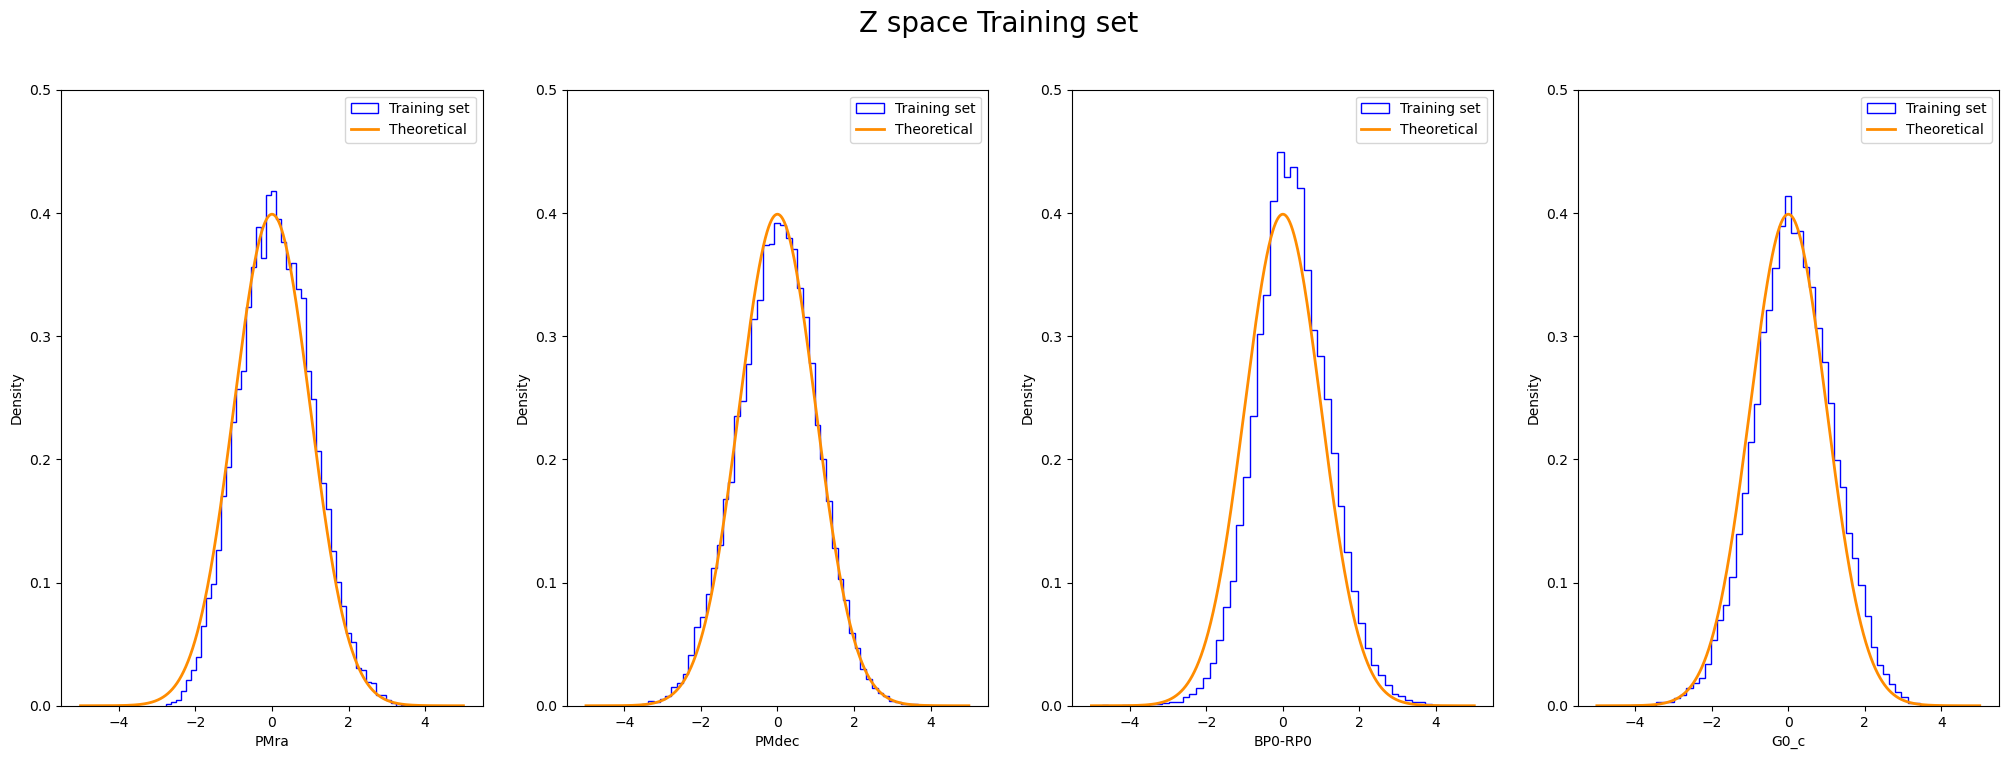

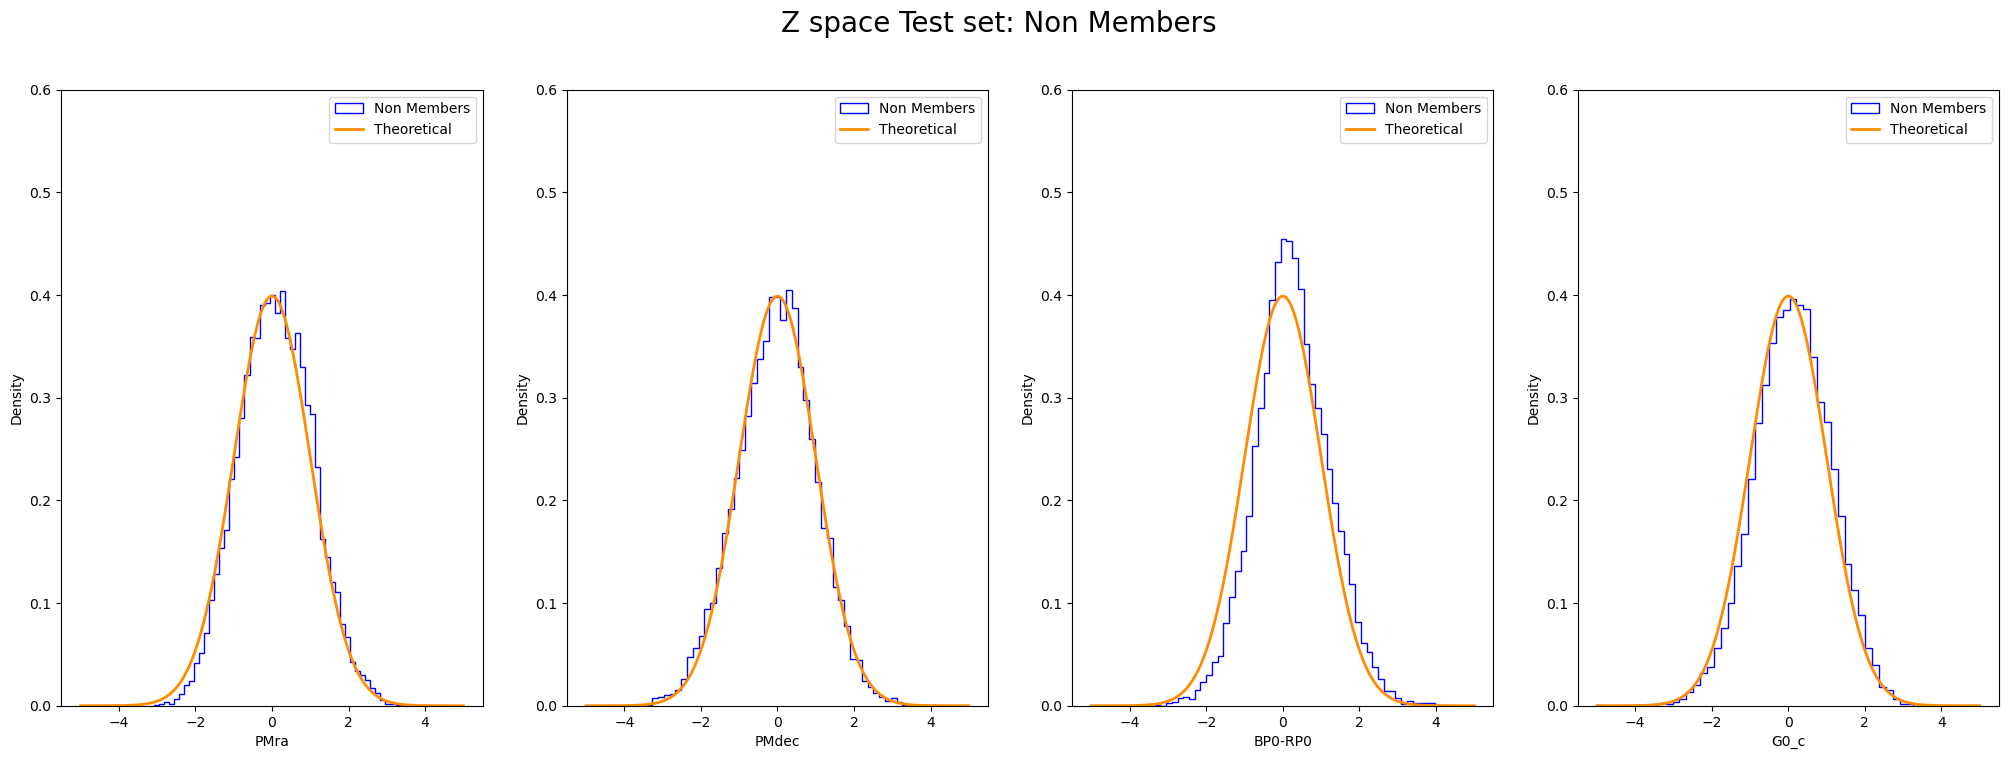

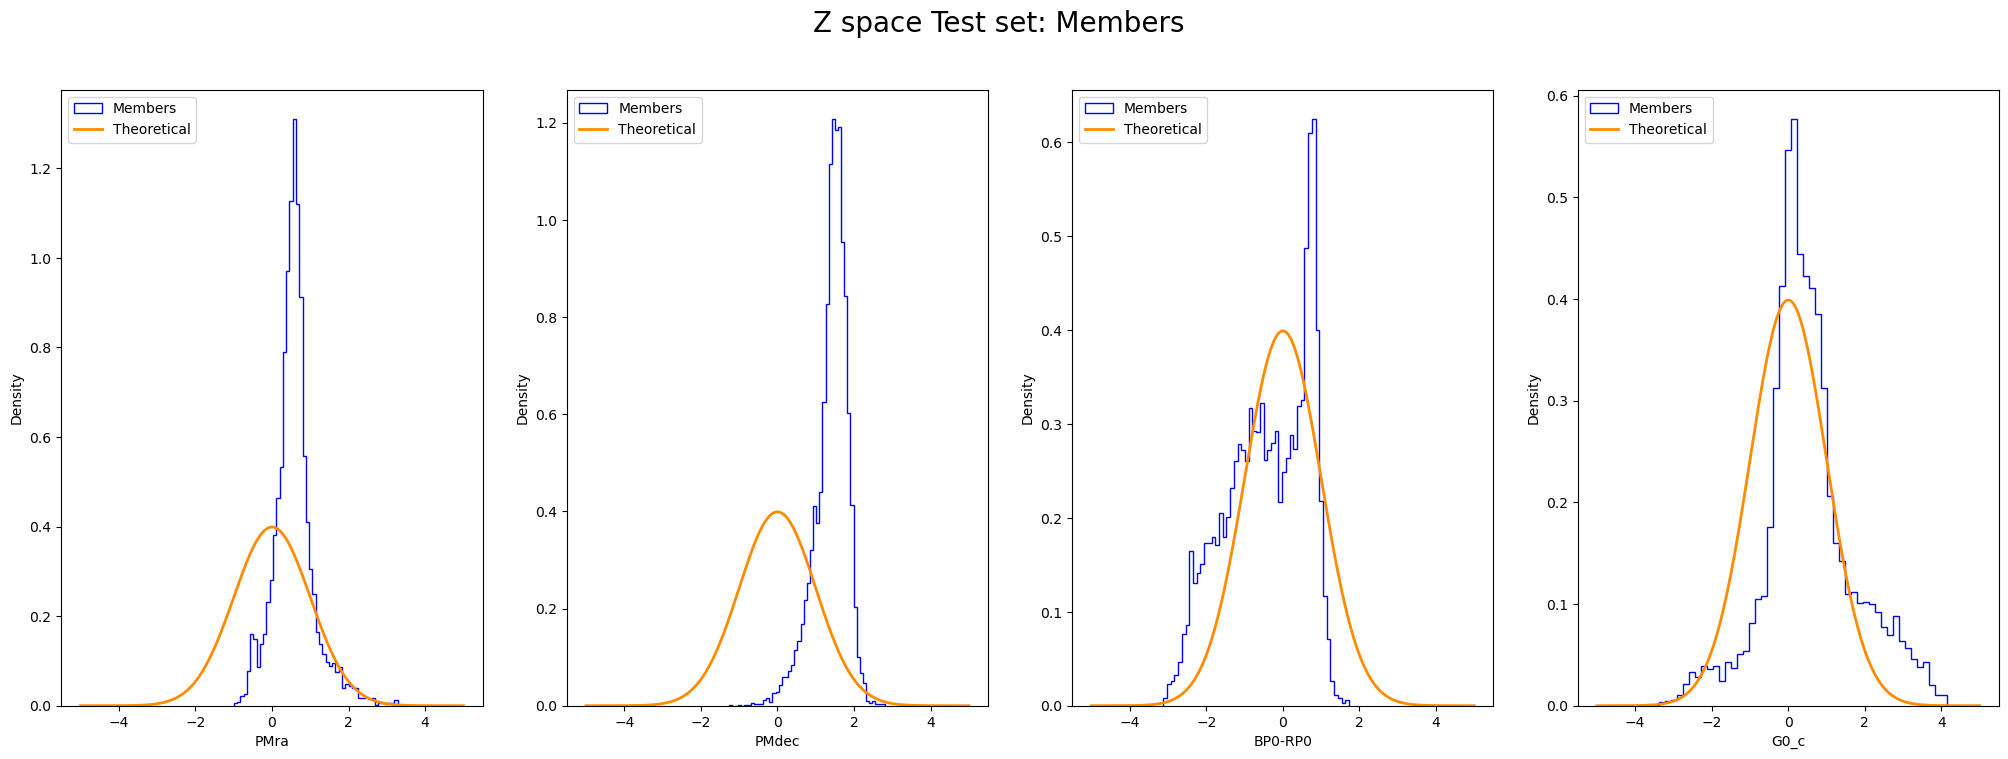

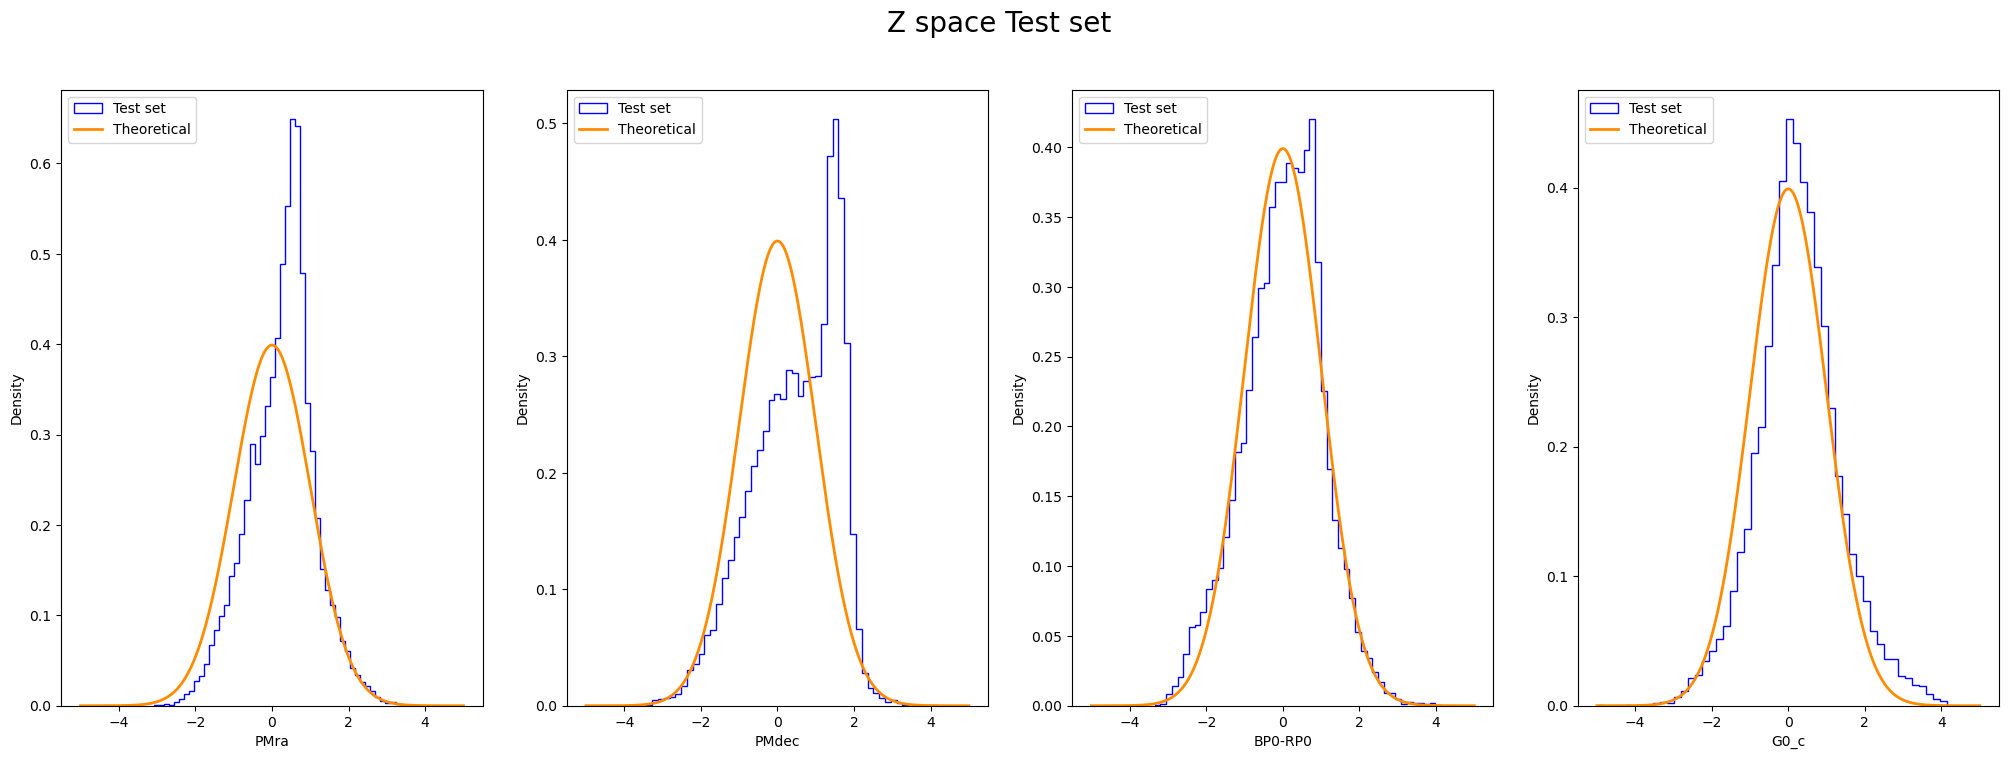

In [7]:
fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Training set', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_train.iloc[:,3+i], color='blue', label='Training set', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_train, y_norm_train, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_train.columns[3+i])
    plt.ylabel('Density')
    plt.ylim(0,0.5)
    plt.legend(loc='upper right')


fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Test set: Non Members', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_test.iloc[nonmembers_indices,3+i], color='blue', label='Non Members', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_test, y_norm_test, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_test.columns[3+i])
    plt.ylabel('Density')
    plt.ylim(0,0.6)
    plt.legend(loc='upper right')


fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Test set: Members', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_test.iloc[members_indices,3+i], color='blue', label='Members', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_test, y_norm_test, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_test.columns[3+i])
    plt.ylabel('Density')
    plt.legend(loc='upper left')

fig = plt.figure(figsize=(25,8))
fig.suptitle('Z space Test set', fontsize=20)
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.hist(z_test.iloc[:,3+i], color='blue', label='Test set', histtype='step', fill=False, bins=50, density=True)
    plt.plot(norm_test, y_norm_test, color='darkorange', label='Theoretical', linewidth=2)
    plt.xlabel(z_test.columns[3+i])
    plt.ylabel('Density')
    plt.legend(loc='upper left')

In [8]:
from sklearn.mixture import BayesianGaussianMixture
from scipy.stats import norm

In [9]:
# Simulate known component (non-members): standard normal
np.random.seed(42)
non_members = np.random.normal(0, 1, size=3000)

# Simulate unknown component (members): e.g., bimodal or skewed
members = np.concatenate([
    np.random.normal(-2, 0.5, size=1000),
    np.random.laplace(2, 0.3, size=1000)
])

# Combined dataset
data = np.concatenate([non_members, members])
data = data.reshape(-1, 1)  # required shape for sklearn


In [10]:
# Fit DPGMM with many components
dpgmm = BayesianGaussianMixture(
    n_components=10,
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=0.1,
    covariance_type='full',
    random_state=0
)
dpgmm.fit(data)


/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, random_state=0,
                        weight_concentration_prior=0.1)

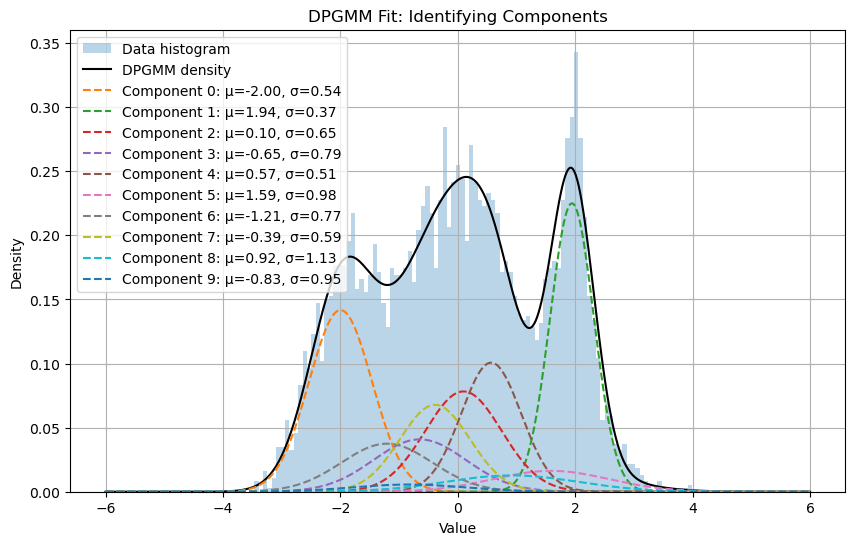

In [11]:
# Create grid
x = np.linspace(-6, 6, 1000).reshape(-1, 1)
densities = np.exp(dpgmm.score_samples(x))

# Plot full density
plt.figure(figsize=(10, 6))
plt.hist(data, bins=100, density=True, alpha=0.3, label='Data histogram')
plt.plot(x, densities, label='DPGMM density', color='black')

# Plot each component
for i in range(dpgmm.n_components):
    mean = dpgmm.means_[i][0]
    std = np.sqrt(dpgmm.covariances_[i][0][0])
    weight = dpgmm.weights_[i]
    if weight > 0.01:
        component = weight * norm.pdf(x, mean, std)
        plt.plot(x, component, linestyle='--', label=f'Component {i}: μ={mean:.2f}, σ={std:.2f}')
        if abs(mean) < 0.1 and abs(std - 1) < 0.1:
            print(f"➡️ Likely non-member component: Component {i} (μ ≈ 0, σ ≈ 1)")

plt.legend()
plt.title("DPGMM Fit: Identifying Components")
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [12]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfb = tfp.bijectors

2025-06-02 16:56:10.420861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Step 0: NLL = 1.6335, mu = 1.0500, sigma = 1.0319
Step 50: NLL = 1.5936, mu = 2.0325, sigma = 0.4692
Step 100: NLL = 1.5926, mu = 1.9924, sigma = 0.5180
Step 150: NLL = 1.5926, mu = 1.9934, sigma = 0.5156
Step 200: NLL = 1.5926, mu = 1.9933, sigma = 0.5157
Step 250: NLL = 1.5926, mu = 1.9933, sigma = 0.5157
Step 300: NLL = 1.5926, mu = 1.9933, sigma = 0.5157
Step 350: NLL = 1.5926, mu = 1.9933, sigma = 0.5157
Step 400: NLL = 1.5926, mu = 1.9933, sigma = 0.5157
Step 450: NLL = 1.5926, mu = 1.9933, sigma = 0.5157


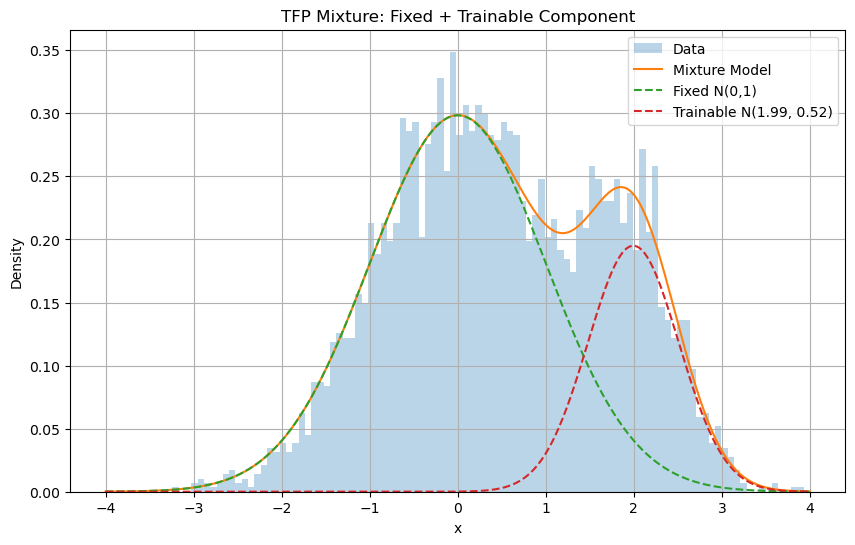

In [13]:
# Simulated data
np.random.seed(42)
non_members = np.random.normal(0, 1, 3000)
members = np.random.normal(2, 0.5, 1000)
data = np.concatenate([non_members, members]).astype(np.float32)
data = data.reshape(-1, 1)

# Define trainable parameters
logits = tf.Variable([0.0, 0.0])  # logits for mixing proportions
mu = tf.Variable(1.0)
sigma = tfp.util.TransformedVariable(1.0, bijector=tfb.Softplus())  # sigma > 0

# Define the mixture model with one fixed component
def mixture_model():
    mix_dist = tfd.Categorical(logits=logits)

    components = [
        tfd.Normal(loc=0.0, scale=1.0),         # fixed standard normal
        tfd.Normal(loc=mu, scale=sigma)         # trainable component

    ]

    return tfd.Mixture(
        cat=mix_dist,
        components=components
    )

# Define loss: negative log likelihood
def nll():
    return -tf.reduce_mean(mixture_model().log_prob(data))

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

# Training loop
for step in range(500):
    with tf.GradientTape() as tape:
        loss = nll()
    grads = tape.gradient(loss, [logits, mu, sigma.trainable_variables[0]])
    optimizer.apply_gradients(zip(grads, [logits, mu, sigma.trainable_variables[0]]))
    if step % 50 == 0:
        print(f"Step {step}: NLL = {loss.numpy():.4f}, mu = {mu.numpy():.4f}, sigma = {sigma.numpy():.4f}")

# Plot results
x = np.linspace(-4, 4, 1000, dtype=np.float32).reshape(-1, 1)
pdf = mixture_model().prob(x)

plt.figure(figsize=(10,6))
plt.hist(data, bins=100, density=True, alpha=0.3, label='Data')
plt.plot(x, pdf, label='Mixture Model')
plt.plot(x, tf.math.softmax(logits)[0] * tfd.Normal(0., 1.).prob(x), '--', label='Fixed N(0,1)')
plt.plot(x, tf.math.softmax(logits)[1] * tfd.Normal(mu, sigma).prob(x), '--', label=f'Trainable N({mu.numpy():.2f}, {sigma.numpy():.2f})')
plt.legend()
plt.title("TFP Mixture: Fixed + Trainable Component")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()


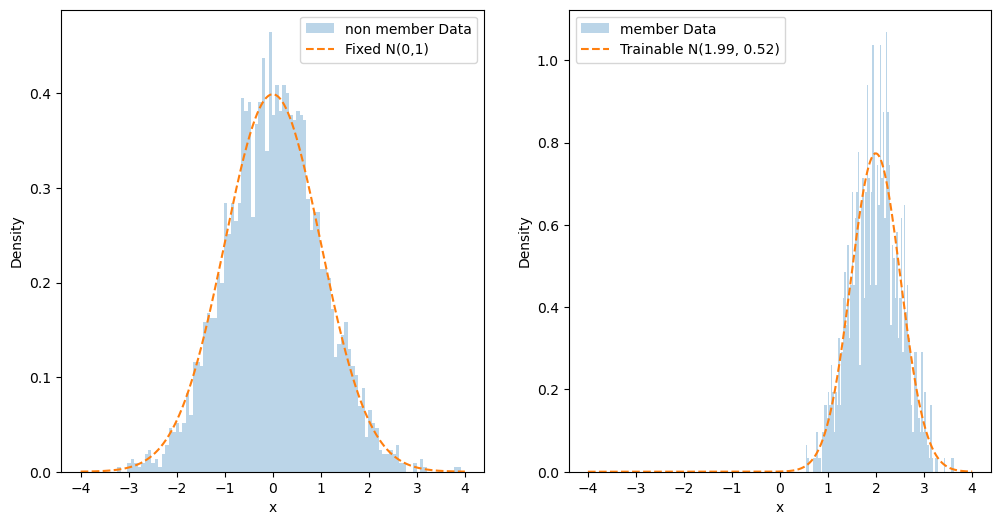

In [14]:
# check if the two gaussian found fir the data

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(non_members, bins=100, density=True, alpha=0.3, label='non member Data')
ax[0].plot(x, tfd.Normal(0., 1.).prob(x), '--', label='Fixed N(0,1)')
ax[0].set_xlabel("x")
ax[0].set_ylabel("Density")
ax[0].legend()

ax[1].hist(members, bins=100, density=True, alpha=0.3, label='member Data')
ax[1].plot(x, tfd.Normal(mu, sigma).prob(x), '--', label=f'Trainable N({mu.numpy():.2f}, {sigma.numpy():.2f})')
ax[1].set_xlabel("x")
ax[1].set_ylabel("Density")
ax[1].legend()
# Plot the individual components

Step 0: NLL = 1.5144, mu = 0.9500, sigma = 0.9687
Step 50: NLL = 1.4225, mu = 1.5215, sigma = 0.2594
Step 100: NLL = 1.4215, mu = 1.5113, sigma = 0.2870
Step 150: NLL = 1.4215, mu = 1.5103, sigma = 0.2891
Step 200: NLL = 1.4215, mu = 1.5101, sigma = 0.2893
Step 250: NLL = 1.4215, mu = 1.5101, sigma = 0.2893
Step 300: NLL = 1.4215, mu = 1.5101, sigma = 0.2893
Step 350: NLL = 1.4215, mu = 1.5101, sigma = 0.2893
Step 400: NLL = 1.4215, mu = 1.5101, sigma = 0.2893
Step 450: NLL = 1.4215, mu = 1.5101, sigma = 0.2893


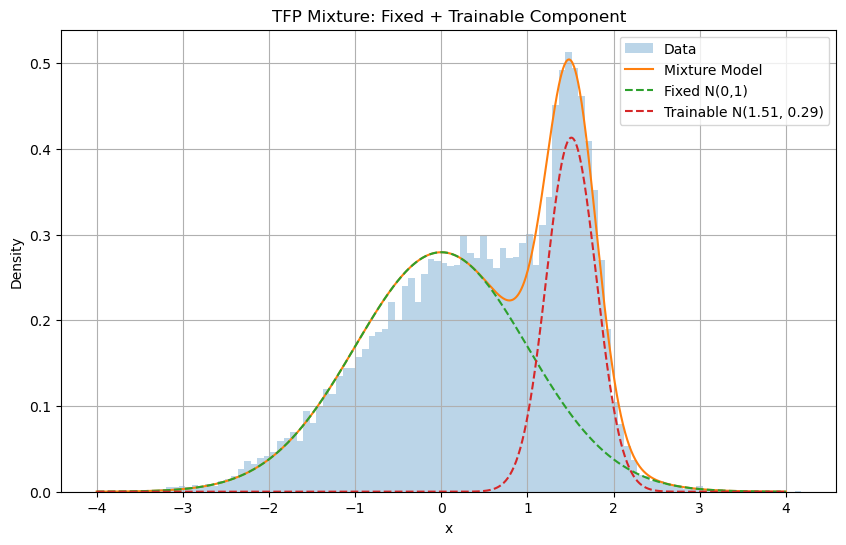

In [15]:
## Let's try on my actual data

non_members = z_test.loc[nonmembers_indices,'PMdec'].values
members = z_test.loc[members_indices,'PMdec'].values
data = np.concatenate([non_members, members]).astype(np.float32)
data = data.reshape(-1, 1)

# Define trainable parameters
logits = tf.Variable([0.0, 0.0])  # logits for mixing proportions
mu = tf.Variable(1.0)
sigma = tfp.util.TransformedVariable(1.0, bijector=tfb.Softplus())  # sigma > 0

# Define the mixture model with one fixed component
def mixture_model():
    mix_dist = tfd.Categorical(logits=logits)

    components = [
        tfd.Normal(loc=0.0, scale=1.0),         # fixed standard normal
        tfd.Normal(loc=mu, scale=sigma)         # trainable component

    ]

    return tfd.Mixture(
        cat=mix_dist,
        components=components
    )

# Define loss: negative log likelihood
def nll():
    return -tf.reduce_mean(mixture_model().log_prob(data))

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

# Training loop
for step in range(500):
    with tf.GradientTape() as tape:
        loss = nll()
    grads = tape.gradient(loss, [logits, mu, sigma.trainable_variables[0]])
    optimizer.apply_gradients(zip(grads, [logits, mu, sigma.trainable_variables[0]]))
    if step % 50 == 0:
        print(f"Step {step}: NLL = {loss.numpy():.4f}, mu = {mu.numpy():.4f}, sigma = {sigma.numpy():.4f}")

# Plot results
x = np.linspace(-4, 4, 1000, dtype=np.float32).reshape(-1, 1)
pdf = mixture_model().prob(x)

plt.figure(figsize=(10,6))
plt.hist(data, bins=100, density=True, alpha=0.3, label='Data')
plt.plot(x, pdf, label='Mixture Model')
plt.plot(x, tf.math.softmax(logits)[0] * tfd.Normal(0., 1.).prob(x), '--', label='Fixed N(0,1)')
plt.plot(x, tf.math.softmax(logits)[1] * tfd.Normal(mu, sigma).prob(x), '--', label=f'Trainable N({mu.numpy():.2f}, {sigma.numpy():.2f})')
plt.legend()
plt.title("TFP Mixture: Fixed + Trainable Component")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

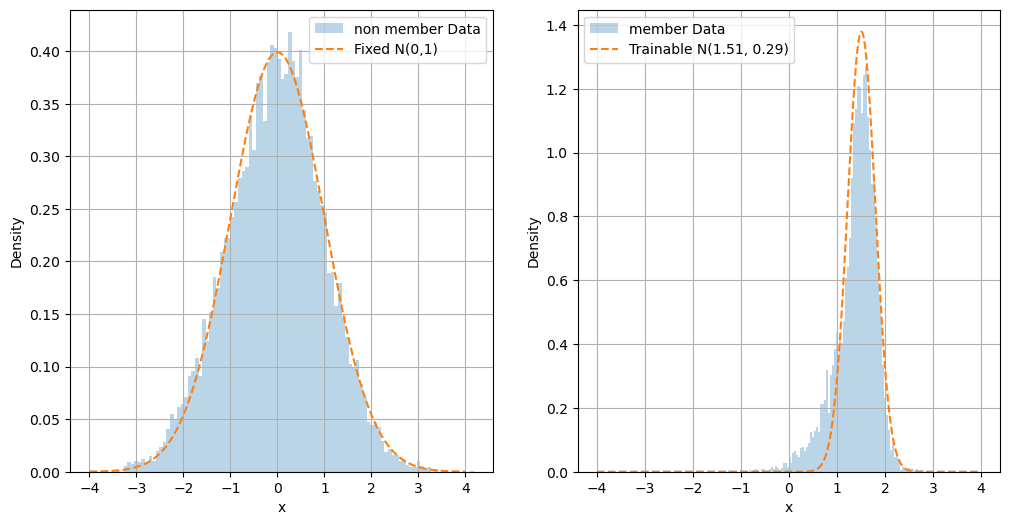

In [16]:
# check if the two gaussian found fir the data

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].hist(non_members, bins=100, density=True, alpha=0.3, label='non member Data')
ax[0].plot(x, tfd.Normal(0., 1.).prob(x), '--', label='Fixed N(0,1)')
ax[0].set_xlabel("x")
ax[0].set_ylabel("Density")
ax[0].grid(True)
ax[0].legend()

ax[1].hist(members, bins=100, density=True, alpha=0.3, label='member Data')
ax[1].plot(x, tfd.Normal(mu, sigma).prob(x), '--', label=f'Trainable N({mu.numpy():.2f}, {sigma.numpy():.2f})')
ax[1].set_xlabel("x")
ax[1].set_ylabel("Density")
ax[1].grid(True)
ax[1].legend()

## K-trainable gaussians

Step 0: Loss = 1.5323
Step 50: Loss = 1.4180
Step 100: Loss = 1.4165
Step 150: Loss = 1.4164
Step 200: Loss = 1.4164
Step 250: Loss = 1.4164
Step 300: Loss = 1.4164
Step 350: Loss = 1.4164
Step 400: Loss = 1.4164
Step 450: Loss = 1.4164


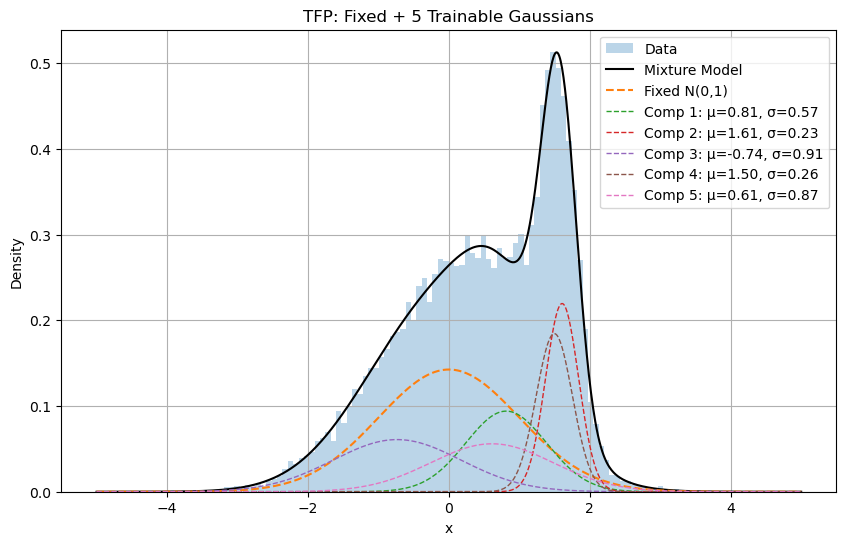

In [19]:
# Number of components
K = 5  # number of trainable Gaussians
total_components = K + 1  # +1 for fixed component

# Initialize trainable parameters
logits = tf.Variable(tf.zeros([total_components]), name="logits")

mu_trainable = tf.Variable(tf.random.normal([K]), name="mu")
sigma_trainable = tfp.util.TransformedVariable(
    tf.ones([K]), bijector=tfb.Softplus(), name="sigma"
)

# Build the full mixture model
def mixture_model():
    cat = tfd.Categorical(logits=logits)

    components = [tfd.Normal(loc=0., scale=1.)]  # fixed component
    for k in range(K):
        components.append(tfd.Normal(loc=mu_trainable[k], scale=sigma_trainable[k]))

    return tfd.Mixture(cat=cat, components=components)

# Loss
def nll():
    return -tf.reduce_mean(mixture_model().log_prob(data))

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

# Training loop
for step in range(500):
    with tf.GradientTape() as tape:
        loss = nll()
    grads = tape.gradient(loss, [logits, mu_trainable, sigma_trainable.trainable_variables[0]])
    optimizer.apply_gradients(zip(grads, [logits, mu_trainable, sigma_trainable.trainable_variables[0]]))
    if step % 50 == 0:
        print(f"Step {step}: Loss = {loss.numpy():.4f}")

# Plot
x = np.linspace(-5, 5, 1000, dtype=np.float32).reshape(-1, 1)
pdf = mixture_model().prob(x)

plt.figure(figsize=(10,6))
plt.hist(data, bins=100, density=True, alpha=0.3, label='Data')
plt.plot(x, pdf, label='Mixture Model', color='black')

weights = tf.nn.softmax(logits).numpy()
plt.plot(x, weights[0] * tfd.Normal(0., 1.).prob(x), '--', label='Fixed N(0,1)', linewidth=1.5)

# Plot trainable components
for k in range(K):
    mu_k = mu_trainable[k].numpy()
    sigma_k = sigma_trainable[k].numpy()
    comp_k = weights[k+1] * tfd.Normal(mu_k, sigma_k).prob(x)
    plt.plot(x, comp_k, '--', label=f'Comp {k+1}: μ={mu_k:.2f}, σ={sigma_k:.2f}', linewidth=1)

plt.legend()
plt.title("TFP: Fixed + 5 Trainable Gaussians")
plt.xlabel("x")
plt.ylabel("Density")
plt.grid(True)
plt.show()

If you’re modeling the "members" distribution separately (i.e., without mixing it with the fixed N(0,1)), and you're comparing against a histogram normalized to unit area, then it makes sense to:

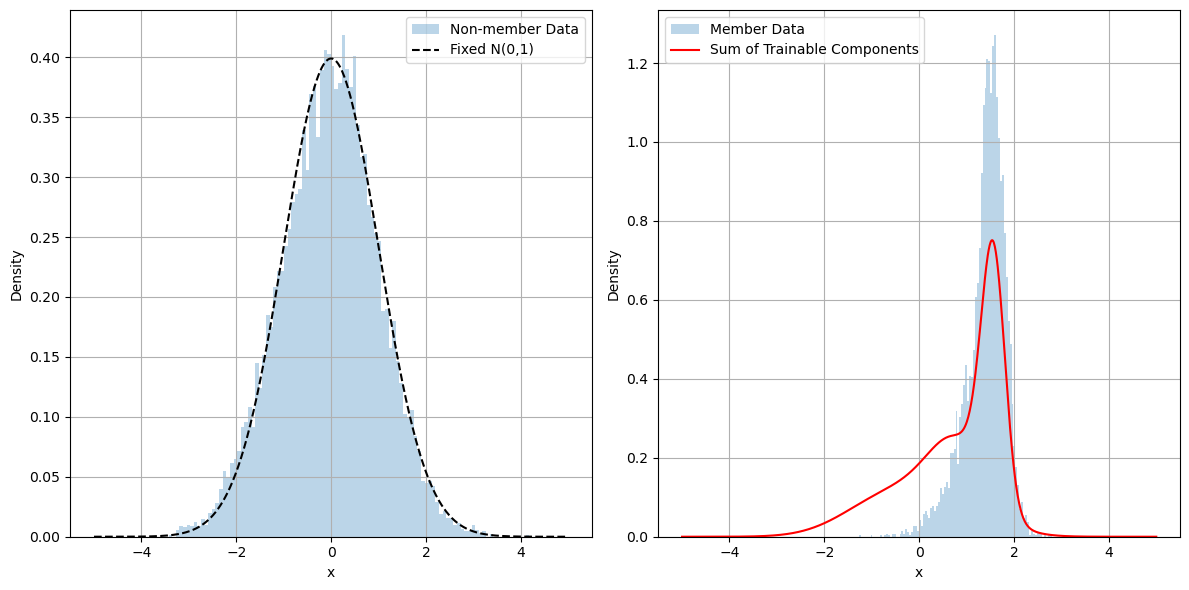

In [25]:
# Compute PDF of trainable components (ignoring weights for now)
pdf_trainable = np.zeros_like(x)
for k in range(K):
    mu_k = mu_trainable[k].numpy()
    sigma_k = sigma_trainable[k].numpy()
    pdf_trainable += tfd.Normal(mu_k, sigma_k).prob(x)

# Normalize the sum of PDFs to integrate to 1
dx = x[1] - x[0]
pdf_trainable /= np.sum(pdf_trainable * dx)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Left: Non-members (fixed Gaussian)
ax[0].hist(non_members, bins=100, density=True, alpha=0.3, label='Non-member Data')
ax[0].plot(x, tfd.Normal(0., 1.).prob(x), '--', label='Fixed N(0,1)', color='black')
ax[0].set_xlabel("x")
ax[0].set_ylabel("Density")
ax[0].grid(True)
ax[0].legend()

# Right: Members (sum of trainable components)
ax[1].hist(members, bins=100, density=True, alpha=0.3, label='Member Data')
ax[1].plot(x, pdf_trainable, '-', label='Sum of Trainable Components', color='red')
ax[1].set_xlabel("x")
ax[1].set_ylabel("Density")
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()


## 4-dimension

Ok seems to work. Now let's try in 4 dimension

In [ ]:
## Let's try on my actual data

non_members = z_test.loc[nonmembers_indices,['PMra','PMdec','BP0-RP0','G0_c']].values
members = z_test.loc[members_indices,['PMra','PMdec','BP0-RP0','G0_c']].values
data = np.concatenate([non_members, members]).astype(np.float32)

init_mu = np.ones(4, dtype=np.float32)
init_cov = np.eye(4, dtype=np.float32)

# Define trainable parameters
logits = tf.Variable([0.0, 0.0], dtype=tf.float32)  # logits for mixing proportions (2 components)
mu = tf.Variable(init_mu)
sigma = tfp.util.TransformedVariable(init_cov, bijector=tfb.Softplus())  # sigma > 0

# Define the mixture model with one fixed component
def mixture_model():
    mix_dist = tfd.Categorical(logits=logits)

    components = [
        tfd.MultivariateNormalFullCovariance(loc=np.zeros(4, dtype=np.float32), covariance_matrix=init_cov),  # fixed standard normal
        tfd.MultivariateNormalFullCovariance(loc=mu, covariance_matrix=sigma)         # trainable component
    ]

    return tfd.Mixture(
        cat=mix_dist,
        components=components
    )

# Define loss: negative log likelihood
def nll():
    return -tf.reduce_mean(mixture_model().log_prob(data))

# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.05)

# Training loop
for step in range(500):
    with tf.GradientTape() as tape:
        loss = nll()
    grads = tape.gradient(loss, [logits, mu, sigma.trainable_variables[0]])
    optimizer.apply_gradients(zip(grads, [logits, mu, sigma.trainable_variables[0]]))
    if step % 50 == 0:
        print(f"Step {step}: NLL = {loss.numpy():.4f}, mu = {mu.numpy()}, sigma =\n{sigma.numpy()}")

# In 4D, direct histogram/PDF plotting is not possible.
# Instead, print the learned parameters:
print("\nLearned mixture weights:", tf.math.softmax(logits).numpy())
print("Learned mean (mu):", mu.numpy())
print("Learned covariance (sigma):\n", sigma.numpy())

Step 0: NLL = 6.0057, mu = [0.95000166 0.9500129  0.9500009  0.9500022 ], sigma =
[[0.9686887  0.         0.         0.        ]
 [0.         0.96869016 0.         0.        ]
 [0.         0.         1.0318934  0.        ]
 [0.         0.         0.         1.0318904 ]]
Step 50: NLL = 5.5760, mu = [ 0.6016181   1.4370855  -0.40370387  0.58294356], sigma =
[[0.1753777  0.         0.         0.        ]
 [0.         0.16159412 0.         0.        ]
 [0.         0.         0.9506206  0.        ]
 [0.         0.         0.         0.8840136 ]]
Step 100: NLL = 5.5664, mu = [ 0.57417136  1.5087186  -0.3069653   0.47400093], sigma =
[[0.09504453 0.         0.         0.        ]
 [0.         0.10060677 0.         0.        ]
 [0.         0.         0.9641755  0.        ]
 [0.         0.         0.         0.63598615]]
Step 150: NLL = 5.5664, mu = [ 0.57543296  1.5075659  -0.30461648  0.47490573], sigma =
[[0.09642387 0.         0.         0.        ]
 [0.         0.10123682 0.         0.    

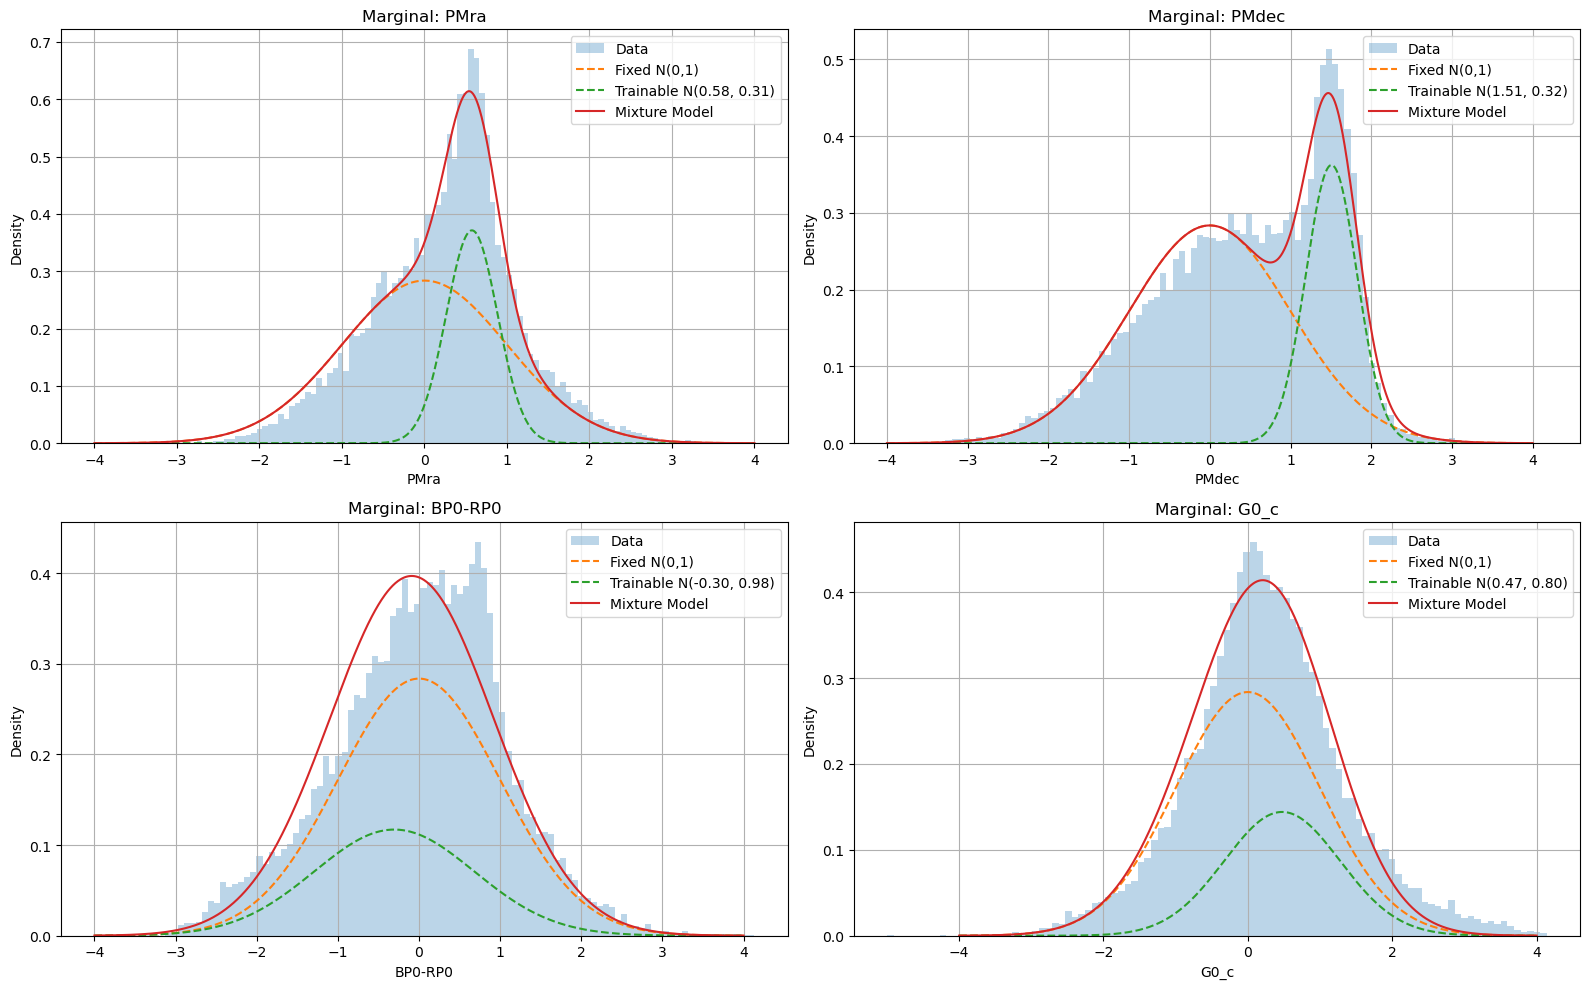

In [44]:
# plot:
# Plot 1D marginal distributions for each component of the 4D dataset

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
component_names = ['PMra', 'PMdec', 'BP0-RP0', 'G0_c']

for i, ax in enumerate(axes.flat):
    # Plot histogram of the data for this component
    ax.hist(data[:, i], bins=100, density=True, alpha=0.3, label='Data')
    
    # Plot fixed standard normal component
    x1d = np.linspace(-4, 4, 1000, dtype=np.float32)
    fixed_pdf = tfd.Normal(0., 1.).prob(x1d)
    ax.plot(x1d, tf.math.softmax(logits)[0] * fixed_pdf, '--', label='Fixed N(0,1)')
    
    # Plot trainable component
    trainable_pdf = tfd.Normal(mu[i], tf.sqrt(sigma.numpy()[i, i])).prob(x1d)
    ax.plot(x1d, tf.math.softmax(logits)[1] * trainable_pdf, '--', label=f'Trainable N({mu.numpy()[i]:.2f}, {np.sqrt(sigma.numpy()[i, i]):.2f})')
    
    # Plot mixture model
    mix_pdf = (tf.math.softmax(logits)[0] * fixed_pdf +
               tf.math.softmax(logits)[1] * trainable_pdf)
    ax.plot(x1d, mix_pdf, label='Mixture Model')
    
    ax.set_title(f"Marginal: {component_names[i]}")
    ax.set_xlabel(component_names[i])
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

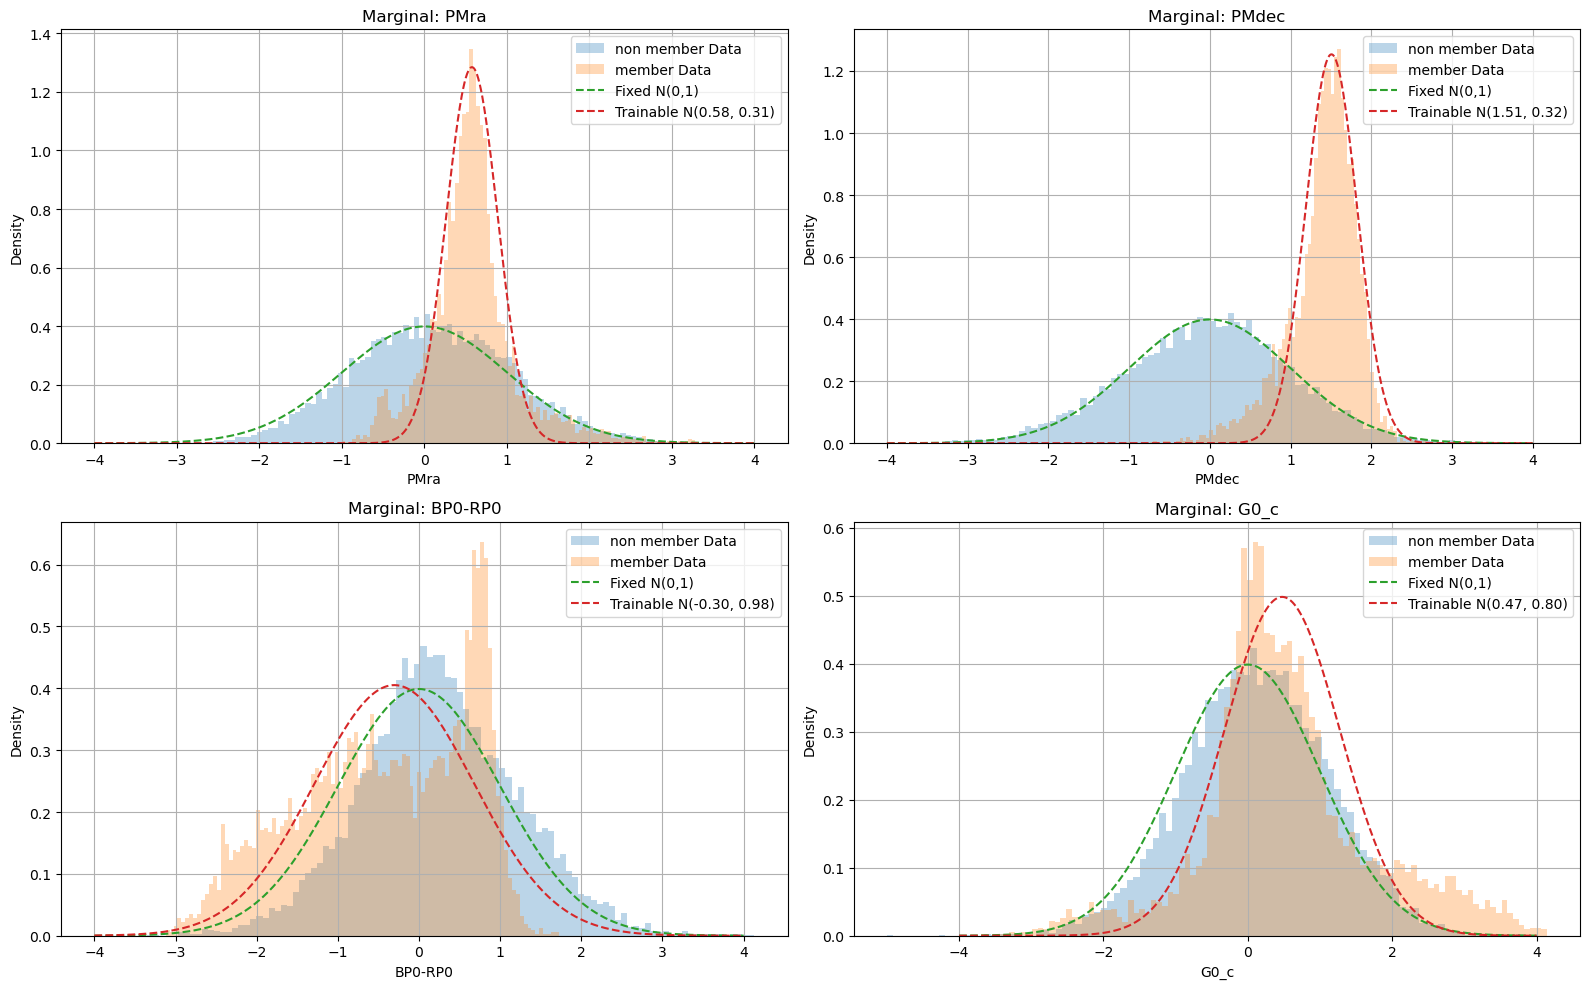

In [45]:
# Plot 1D marginal distributions for each component of the 4D dataset (non_members vs members)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
component_names = ['PMra', 'PMdec', 'BP0-RP0', 'G0_c']

for i, ax in enumerate(axes.flat):
    # Plot histogram for non-members
    ax.hist(non_members[:, i], bins=100, density=True, alpha=0.3, label='non member Data')
    # Plot histogram for members
    ax.hist(members[:, i], bins=100, density=True, alpha=0.3, label='member Data')
    
    # Plot fixed standard normal component
    fixed_pdf = tfd.Normal(0., 1.).prob(x1d)
    ax.plot(x1d, fixed_pdf, '--', label='Fixed N(0,1)')
    
    # Plot trainable component
    trainable_pdf = tfd.Normal(mu[i], tf.sqrt(sigma.numpy()[i, i])).prob(x1d)
    ax.plot(x1d, trainable_pdf, '--', label=f'Trainable N({mu.numpy()[i]:.2f}, {np.sqrt(sigma.numpy()[i, i]):.2f})')
    
    ax.set_title(f"Marginal: {component_names[i]}")
    ax.set_xlabel(component_names[i])
    ax.set_ylabel("Density")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()